# 1. Simulation of Markov Process

In [1]:
import numpy as np

## a)

## Step 1. Initialization.

In [2]:
x = np.array([1, 0, 0])
print(x)

[1 0 0]


## Step 2. Transition probabilities.

In [3]:
P = np.array([
    [0.2, 0.7, 0.1],
    [0.2, 0.5, 0.3],
    [0.2, 0.4, 0.4]
])
print(P)

[[0.2 0.7 0.1]
 [0.2 0.5 0.3]
 [0.2 0.4 0.4]]


# b)

## Step 3. Simulation of one single realization.

In [4]:
x_new = np.dot(x,P)
print(x_new)
x = x_new

[0.2 0.7 0.1]


## 4. Random choice of the state based on the single realization

In [5]:
next_state = np.random.choice([1, 2, 3],p = x)
print(next_state)

2


# 2. Stationary Distribution.

## a)

In [6]:
P_T = P.T
print(P_T)

[[0.2 0.2 0.2]
 [0.7 0.5 0.4]
 [0.1 0.3 0.4]]


In [7]:
from scipy.linalg import eig

eigenvalues, eigenvectors = np.linalg.eig(P_T)
stationary_vector = np.array(eigenvectors[:, np.isclose(eigenvalues, 1)]).flatten().real
stationary_vector /= stationary_vector.sum()

print(stationary_vector)

[0.2        0.51111111 0.28888889]


## b)

stationary distribution, π∞,= [0.2        0.51111111 0.28888889]


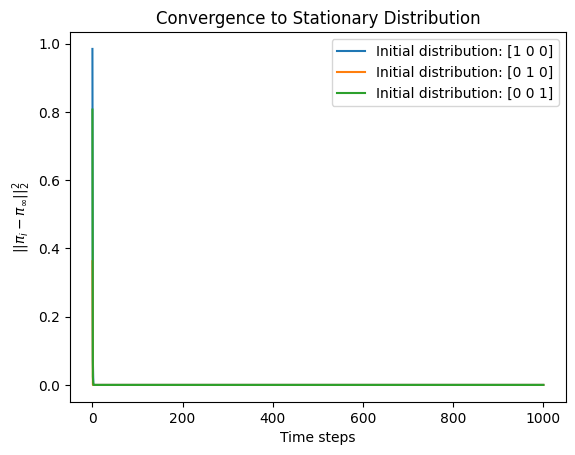

,State 1,State 2,State 3
0,0.0,0.000000,1.000000
1,0.2,0.400000,0.400000
2,0.2,0.500000,0.300000
3,0.2,0.510000,0.290000
4,0.2,0.511000,0.289000
...,...,...,...
996,0.2,0.511111,0.288889
997,0.2,0.511111,0.288889
998,0.2,0.511111,0.288889
999,0.2,0.511111,0.288889


In [8]:
import matplotlib.pyplot as plt
import pandas as pd

def find_stationary_distribution(transition_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
    stationary_vector = np.array(eigenvectors[:, np.isclose(eigenvalues, 1)]).flatten().real
    stationary_vector /= stationary_vector.sum()
    return stationary_vector


pi_infinity = find_stationary_distribution(P)
print('stationary distribution, \u03C0\u221E,=',pi_infinity)


def simulate_convergence(transition_matrix, initial_distribution, steps):
    pi_t = initial_distribution
    convergence = [pi_t]
    for _ in range(steps):
        pi_t = pi_t.dot(transition_matrix)
        convergence.append(pi_t)
    return convergence

initial_distributions = [np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1])]
steps = 1000

for pi_0 in initial_distributions:
    convergence = simulate_convergence(P, pi_0, steps)
    distance_to_stationary = [np.linalg.norm(pi_t - pi_infinity, 2)**2 for pi_t in convergence]
    plt.plot(distance_to_stationary, label=f'Initial distribution: {pi_0}')

plt.xlabel('Time steps')
plt.ylabel(r'$||\pi_i - \pi_{\infty}||^2_2$')
plt.title('Convergence to Stationary Distribution')
plt.legend()
plt.savefig("my_plot.png")
plt.show()


df = pd.DataFrame(convergence)
# New column names
new_column_names = ['State 1', 'State 2', 'State 3']

# Assigning new column names to the DataFrame
df.columns = new_column_names
pd.set_option('display.max_rows', 10)
# Display the DataFrame
display(df)


# 3. Absorbing state.

## a)

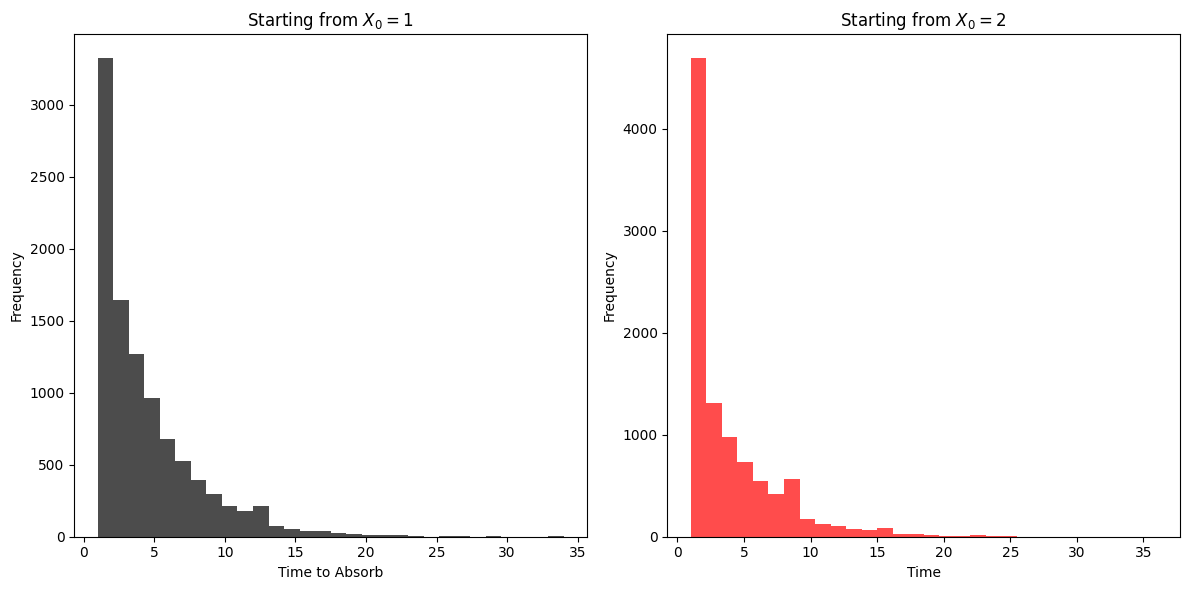

(4.5897, 3.8819)

In [12]:
def simulate_markov_chain(P, start_state):
    current_state = start_state
    time_to_absorb = 0
    
    while current_state != 2: # Assuming state 3 is absorbing
        time_to_absorb += 1
        current_state = np.random.choice([0, 1, 2], p=P[current_state])
    return time_to_absorb

def multiple_simulations(P, start_state, num_simulations):
    times_to_absorb = [simulate_markov_chain(P, start_state) for _ in range(num_simulations)]
    return times_to_absorb

num_simulations = 10000

# Simulations starting from state 0 (X_0 = 1)
times_from_1 = multiple_simulations(P, 0, num_simulations)

# Simulations starting from state 1 (X_0 = 2)
times_from_2 = multiple_simulations(P, 1, num_simulations)

# Means
mean_time_from_1 = np.mean(times_from_1)
mean_time_from_2 = np.mean(times_from_2)


plt.figure(figsize=(12, 6))
# Histogram for times starting from state 0
plt.subplot(1, 2, 1)
plt.hist(times_from_1, bins=30, color='black', alpha=0.7)
plt.title('Starting from $X_0 = 1$')
plt.xlabel('Time to Absorb')
plt.ylabel('Frequency')

# Histogram for times starting from state 1
plt.subplot(1, 2, 2)
plt.hist(times_from_2, bins=30, color='red', alpha=0.7)
plt.title('Starting from $X_0 = 2$')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig("histogram")
plt.show()

(mean_time_from_1, mean_time_from_2)


## b) Theoretical solution.

In [10]:
from scipy.linalg import solve

A = np.array([[1 - P[0, 0], -P[0, 1]],
              [-P[1, 0], 1 - P[1, 1]]])

b = np.array([1, 1])

theoretical_mean_times = solve(A, b)

theoretical_mean_times


array([4.61538462, 3.84615385])